## Assignment 3 20321541
### Question 1 a)

In [34]:
using Random, Statistics, Ipopt, JuMP,LinearAlgebra, Distributions
using Optim, Plots

nsim = 10000;
w = -100 * log.(rand(Float64, (nsim)));

modeli = Model(Ipopt.Optimizer)
set_silent(modeli)
@variable(modeli, 0 <= x)
@variable(modeli, 0 <= u[1:nsim])
for i in 1:nsim
    @constraint(modeli, w[i] - x <= u[i])
end
@objective(modeli, Max, 1.5 * (mean(w) - mean(u)) - x)
optimize!(modeli)

print("Optimal number of newspapers to sell is ", value(x))
print("\nExpected profit is ", 1.5 * (mean(w) - mean(value.(u))) - value(x))

Optimal number of newspapers to sell is 40.83518920844682
Expected profit is 9.431334318235471

### Question 1 b)

Given demand $W$ distributed as $\operatorname{Exp}(100)$, with unit cost of 1, and selling price of 1.5, the  profit function $\pi(x)$ and expected value of the minimum of $W$ and $x$ are:

$$
\pi(x) = 1.5 \cdot \min(W, x) - x
$$

Furthermore, we can incorporate our hint which provides further information around the expected value of our profit

$$
E[\min(W, x)] = 100 \cdot (1 - \exp(-\frac{x}{100}))
$$

To find the optimum, differentiate the expected profit with respect to $x$, set the derivative to zero, and solve for $x$:

$$
\frac{d}{dx}\pi(x) = 1.5 \cdot \exp\left(-\frac{x}{100}\right) - 1
$$

Set this equal to zero to find the optimum:

$$
1.5 \cdot \exp\left(-\frac{x}{100}\right) = 1
$$

$$
x = -100 \cdot \ln\left(\frac{2}{3}\right)
$$

$$
x \approx 40.5465
$$

Substitute $x = 40.5465$ into the expected profit function:

$$
E[\pi(40.5465)] = 1.5 \cdot 100 \cdot (1 - \exp\left(-\frac{40.5465}{100}\right)) - 40.5465
$$

$$
E[\pi(40.5465)] \approx 9.45
$$

Therefore, the expected profit when ordering 40.5465 newspapers is approximately $9.45.

### Question 1 c)

In [27]:
nsim = 5000
w1 = -50 * log.(rand(Float64, (nsim)));
w2 = -50 * log.(rand(Float64, (nsim)));

model2 = Model(Ipopt.Optimizer)
set_silent(model2)

@variable(model2, 0 <= x2)
@variable(model2, 0 <= x1)
@variable(model2, 0 <= u[1:nsim])
@variable(model2, 0 <= v[1:nsim])
for i in 1:nsim
    @constraint(model2, w1[i] - x1 <= u[i])
    @constraint(model2, w2[i] - (x2 - x1) <= v[i])
end
@objective(model2, Max, 1.5 * (mean(w1) - mean(u)) - x1 + 1.5 * (mean(w2) - mean(v)) - (x2 - x1))
optimize!(model2)
x1 = value(x1)
x2 = value(x2) - x1
u = value.(u)
v = value.(v)
print("Got x1 at ", x1, " and x2 at ", x2)
print("\nMaximum expected profit with 2 deliveries is ", 
    1.5 * (mean(w1) - mean(u)) - x1 + 1.5 * (mean(w2) - mean(v)) - (x2))

Got x1 at 20.02936533526564 and x2 at 21.052851642871705
Maximum expected profit with 2 deliveries is 9.532339654105446

### Question 1 d)

Below, we have the analytical solution to the above.

Let's denote the number of newspapers ordered in the morning as $x_1$ 

The profit function for the morning is represented by:
$$P(x_1)=1.5 \cdot \min(W_1, x_1) - 1 \cdot x_1$$

To compute the expected profit $\mathbb{E}[\min(W_1, x_1)]$, we consider the cases where demand $W_1$ is either less than or equal to $x_1$ or greater than $x_1$:
- If $W_1 \leq x_1$, then the expected profit is $\mathbb{E}[W_1]$.
- If $W_1 > x_1$, then the expected profit is $x_1$.

This leads us to the expected value expression:
$$\mathbb{E}[\min(W_1, x_1)] = \int_{0}^{x_1} w_1 f_{W_1}(w_1) \, dw_1 + \int_{x_1}^{\infty} x_1 f_{W_1}(w_1) \, dw_1$$
where $f_{W_1}(w_1) = \frac{1}{50}e^{-\frac{w_1}{50}}$ is the PDF for the exponential distribution.

Therefore, as we have seen before:
$$\mathbb{E}[\min(W_1, x_1)] = 50 \left(1 - e^{-\frac{x_1}{50}}\right)$$

The derived profit function then becomes:

Let us use derived profit function. Then we differentiate and let =0. This will solve for the maximum profit
$$P(x_1) = 1.5 \cdot [50 \left(1 - e^{-\frac{x_1}{50}}\right)] - x_1 = 75 - 75e^{-\frac{x_1}{50}} - x_1$$

$$P'(x_1) = \frac{75}{50}e^{-\frac{x_1}{50}} - 1 = 0$$

Solving this equation for $x_1$ gives us:
$$x_1 = -50 \ln\left(\frac{50}{75}\right) \approx 20.27326$$

If we treat $x_1$ so that it must be an integer, the optimal number of newspapers to order is either $20$ or $21$. The afternoon situation is identical, given that $W_2$ also has a mean of 50, leading to $x_2 = 20$ or $x_2 = 21$. 

Once again this was done analytically. The optimal order quantities were as follows;
20 in Morning
20 in Afternoon (Both rounded)
This leads to a Maximum average profit of $9.45

It is worth noting that these figures are relatively close to our above c). This is expected as the large number of simulations chosen implies that we expect this to be relatively accurate

### Question 1 e)

$$
\begin{aligned}
\pi (x) &= p \ \text{min}(W, x) - cx \\
E[\text{min}(W, x)] &= \int_{-\infty}^x \omega f(\omega) d\omega + \int_{x}^\infty x f(\omega) d\omega \\
&\text{By the fundamental theorem of calculus} \\
\frac{d \ E[\text{min}(W, x)]}{dx} &= x f(x) - 0 + \int_{x}^\infty f(\omega) d\omega + (- x f(x)) \\
&= \int_{x}^\infty f(\omega) d\omega = 1 - F(x) \\
\frac{d E[\pi(x)]}{dx} = 0 &\implies p (1 - F(x)) - c = 0 \\
\implies F(x) &= 1 - \frac{c}{p} \\
\implies x^* &= F^{-1} \left(1 - \frac{c}{p}\right)
\end{aligned}
$$

As before, this is done analytically leading to an optimal ordering choice as before

### Question 2 a)

Optimal weight: 0.5477
Expected ret: 0.0919
Portfolio vol: 0.1


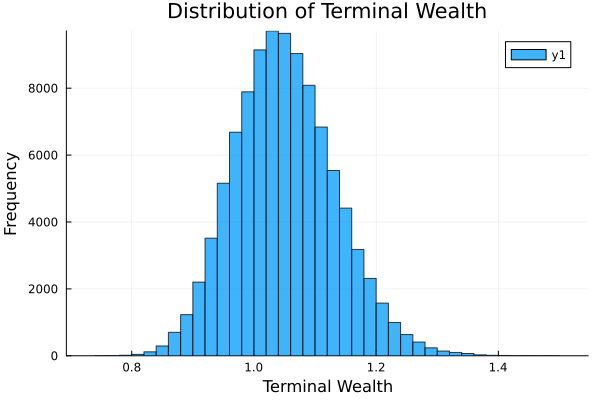

In [28]:
# Parameters
annual_ret = 0.08 
annual_vol = 0.20 
semi_annual_vol_budget = 0.10

# change annual vol to semi-annual
semi_annual_vol = annual_vol / sqrt(2)  # semi-annual vol

# Adjusted ret and vol for the per-period 
per_period_ret = annual_ret / 3
per_period_vol = semi_annual_vol / sqrt(3)

# Function for expected ret of a portfolio given weights
portfolio_ret(weights) = weights[1] * per_period_ret * 2 + weights[1] * (exp(per_period_ret + per_period_vol) - 1)

# Function for portfolio vol given weights
portfolio_vol(weights) = sqrt(weights[1]^2 * per_period_vol^2 * 2 + weights[1]^2 * semi_annual_vol^2)

function objective(weights)
    return -portfolio_ret(weights)
end

# Define constraints 
function penalty(weights)
    vol_constraint = portfolio_vol(weights) - semi_annual_vol_budget
    return ifelse(vol_constraint > 0, 1000 * abs(vol_constraint), 0)  # A large penalty for violating the constraint
end

function objective_with_penalty(weights)
    return objective(weights) + penalty(weights)
end

lower_bounds = [0.0]
upper_bounds = [1.0]
initial_weights = [0.99]

# Run optimization
opt_result = optimize(objective_with_penalty, lower_bounds, upper_bounds, initial_weights, Fminbox())

optimal_weights = Optim.minimizer(opt_result)[1]
optimal_ret = -Optim.minimum(opt_result) - penalty([optimal_weights])
optimal_vol = portfolio_vol([optimal_weights])

println("Optimal weight: $(round(optimal_weights, digits=4))")
println("Expected ret: $(round(optimal_ret, digits=4))")
println("Portfolio vol: $(round(optimal_vol, digits=4))")

# Simulate terminal wealth 
num_scenarios = 100000
terminal_wealths = [prod(1 .+ optimal_weights * (rand(LogNormal(per_period_ret, per_period_vol), 3) .- 1)) for _ in 1:num_scenarios]

histogram(terminal_wealths, bins=50, alpha=0.75)
xlabel!("Terminal Wealth")
ylabel!("Frequency")
title!("Distribution of Terminal Wealth")

### Question 2 b)

Optimal weight for utility maximization is: 0.5477
Optimal utility value is: 0.0878


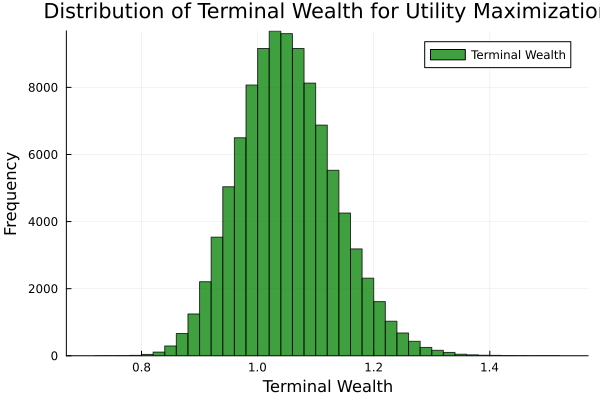

In [29]:
#Part (b)

annual_ret = 0.08  
annual_vol = 0.20 
semi_annual_vol_budget = 0.10  
num_simulations = 100000  
semi_annual_vol = annual_vol / sqrt(2)  # semi-annual vol
per_period_ret = annual_ret / 3
per_period_vol = semi_annual_vol / sqrt(3)

utility_function(terminal_wealth) = 1 - exp(-terminal_wealth)

function expected_utility(weights)
    terminal_wealth = weights[1] * (2 * per_period_ret + (exp(per_period_ret + per_period_vol) - 1))
    return utility_function(terminal_wealth)
end

# Objective function for the optimization 
utility_objective(weights) = -expected_utility(weights)

# Constraints
function constraints_penalty(weights)
    vol = portfolio_vol(weights)
    if vol > semi_annual_vol_budget
        return 1e6 * (vol - semi_annual_vol_budget)^2  # Large penalty
    else
        return 0
    end
end

objective_with_constraints(weights) = utility_objective(weights) + constraints_penalty(weights)

# Bounds for the weights
lower_bounds = [0.0]
upper_bounds = [1.0]
initial_weights = [0.99]

# Run the optimization
opt_result = optimize(objective_with_constraints, lower_bounds, upper_bounds, initial_weights, Fminbox())

# Extract the results from optimization 
optimal_weights_utility = Optim.minimizer(opt_result)[1]
optimal_utility_value = -objective_with_constraints(optimal_weights_utility)  # Negative because we minimized the negative utility

println("Optimal weight for utility maximization is: $(round(optimal_weights_utility, digits=4))")
println("Optimal utility value is: $(round(optimal_utility_value, digits=4))")

terminal_wealths_utility = [prod(1 .+ optimal_weights_utility * (rand(LogNormal(per_period_ret, per_period_vol), 3) .- 1)) for _ in 1:num_simulations]

histogram(terminal_wealths_utility, bins=50, alpha=0.75, label="Terminal Wealth", color="green")
xlabel!("Terminal Wealth")
ylabel!("Frequency")
title!("Distribution of Terminal Wealth for Utility Maximization")


### Question 2 c)

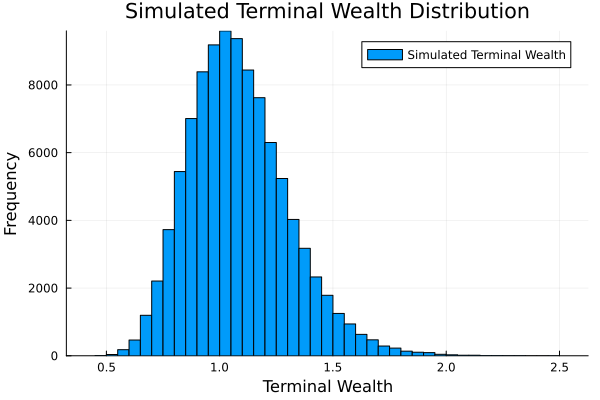

In [30]:
# Part (c)
using Interpolations
annual_ret = 0.08  # annual ret
annual_vol = 0.20  # annual vol
time_periods = 3  
num_paths = 100000  

per_period_ret = annual_ret / time_periods
per_period_vol = annual_vol / sqrt(time_periods)

utility(x) = 1 - exp(-x)

# Simulate lognormal increments for the risky asset's return
function simulate_paths(num_paths, time_periods, per_period_ret, per_period_vol)
    paths = exp.(rand(Normal(per_period_ret - 0.5 * per_period_vol^2, per_period_vol), time_periods, num_paths))
    return cumprod(paths, dims=1)  # Compounded returns
end

# Define the expected utility of terminal wealth 
function terminal_wealth_utility(weights, paths)
    terminal_wealths = weights[1] * paths[end, :]
    utilities = utility.(terminal_wealths)
    return mean(utilities)
end

# Interpolate the value function 
function interpolate_value(x, values)
    itp = interpolate(values, BSpline(Linear()))
    sitp = scale(itp, x)
    return sitp
end

function optimize_utility(num_paths, time_periods, per_period_ret, per_period_vol)
    paths = simulate_paths(num_paths, time_periods, per_period_ret, per_period_vol)
    function objective(weights)
        -terminal_wealth_utility(weights, paths)  # We will maximize by minimizing the negative utility
    end
    result = optimize(objective, [0.0], [1.0], [0.5], Fminbox())
    return result
end

# Run optimization
opt_result = optimize_utility(num_paths, time_periods, per_period_ret, per_period_vol)
optimal_weight = Optim.minimizer(opt_result)[1]

terminal_wealths = simulate_paths(num_paths, time_periods, per_period_ret, per_period_vol)[end, :] * optimal_weight

histogram(terminal_wealths, bins=50, label="Simulated Terminal Wealth")
xlabel!("Terminal Wealth")
ylabel!("Frequency")
title!("Simulated Terminal Wealth Distribution")


## Question 3 Results

In [57]:
using Plots
using Distributions
using Optim

# Data processing
default_rates = [2.631, 0.286, 0.453, 0.456, 0.275, 0.361, 0.176, 0.354,
                 0.354, 0.088, 0.344, 0.162, 1.040, 0.900, 0.869, 0.952,
                 1.830, 1.423, 1.393, 2.226, 3.572, 2.803, 1.337, 0.899,
                 0.651, 0.899, 0.506, 0.616, 1.137, 2.123, 2.455, 3.679,
                 2.924, 1.828, 0.834, 0.647, 0.593, 0.349, 2.507, 4.996,
                 1.232, 0.906, 1.230, 1.232, 0.939, 1.732, 2.149] ./ 100

log_likelihood(PD, r) = -log((1 / r) - 1) - mean(quantile.(Normal(), default_rates).^2.0 .- (sqrt(1 - r) .* quantile.(Normal(), default_rates) .- quantile.(Normal(), PD)).^2.0 ./ r)

mdl = Model(Ipopt.Optimizer)
register(mdl, :log_likelihood, 2, log_likelihood, autodiff=true)
set_silent(mdl)
@variable(mdl, PD >= 0.001)
@variable(mdl, r >= 0.001)
@NLobjective(mdl,Min,log_likelihood(PD,r))
optimize!(mdl);
opt_r=value(r)
opt_PD=value(PD)
[opt_r opt_PD]

1×2 Matrix{Float64}:
 0.0978645  0.0131753

We can see that the above values approximately match the values $\rho = 0.98$ and $\text{PD} = 1.32 \%$

In [58]:
worst(x)=cdf(Normal(), (quantile(Normal(), opt_PD)+sqrt(opt_r)*quantile.(Normal(), x))/(sqrt(1-opt_r)))
worst(0.999)

0.09332406472830132

Using the values above, we calculate the 99.9% worst case default rate, which is approximately $9.33\%$, equal to that seen in the book.

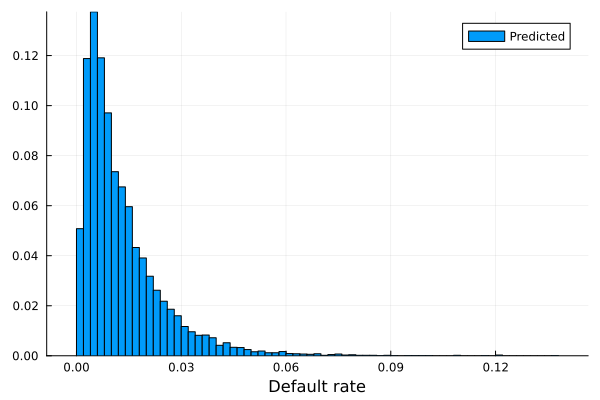

In [69]:
sim=rand(10000);
worst_rates=worst.(sim)
histogram(worst_rates, bins = 100, normalize=:probability, xlab="Default rate", label = "Predicted")